In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from itertools import combinations
from statistics import mean

from implementation_of_algorithms import PreMaxvol, maxvol

## The quality of the submatrix selection $r \times r$ for the algorithms `maxvol`, `pre_maxvol`, full search for all submatrices of size $r\times r$ and random selection of $r$ rows of the matrix.

**Maxdet** (Full search for all submatrices of size $r\times r$)

Input: $A\in\mathbb{R}^{N\times r}$.

Output: The largest volume among
all submatrices of size $r\times r$.

In [2]:
def maxdet(A):
    arange_N = np.arange(A.shape[0])
    r = A.shape[1]
    maxdet = 0
    for subset in combinations(arange_N, r):
        Ap_det = calculate_det(A, list(subset))
        if Ap_det > maxdet:
            maxdet = Ap_det
    return maxdet

def calculate_det(A, ind):
    return np.sqrt(np.abs(np.linalg.det(A[ind].T @ A[ind])))

In [3]:
def plotvolume(lower, upper, rank):
    res_maxvol = []
    res_pre_maxvol = []
    res_maxdet = []
    res_rand = []
    ind = []

    for i in range(lower, upper):
        ind.append(i)
        cur_maxvol = []
        cur_premaxvol = []
        cur_maxdet = []
        cur_randdet = []
        for j in range(16):
            A = np.random.randn(i, rank)
            ind_random = np.random.choice(np.arange(i), rank)
            ind_maxvol = maxvol(A)
            ind_premaxvol = PreMaxvol(A.T, rank)
            cur_randdet.append(calculate_det(A, ind_random))
            cur_maxvol.append(calculate_det(A, ind_maxvol))
            cur_premaxvol.append(calculate_det(A, ind_premaxvol))
            cur_maxdet.append(maxdet(A))

        res_maxvol.append(mean(cur_maxvol))
        res_pre_maxvol.append(mean(cur_premaxvol))
        res_maxdet.append(mean(cur_maxdet))
        res_rand.append(mean(cur_randdet))

    fig, ax = plt.subplots(figsize=(7, 4))
    ax.set_xlabel('Number of rows')
    ax.set_ylabel('Volume')
    ax.set_title(f'Compare algorithms, rank = {rank}')

    plt.plot(ind, res_pre_maxvol, label='pre_maxvol', color='y')
    plt.plot(ind, res_maxvol, label='maxvol', color='g')
    plt.plot(ind, res_maxdet, label='maxdet', color='r')
    plt.plot(ind, res_rand, label='random rows', color='b')
    plt.legend()
    plt.show()

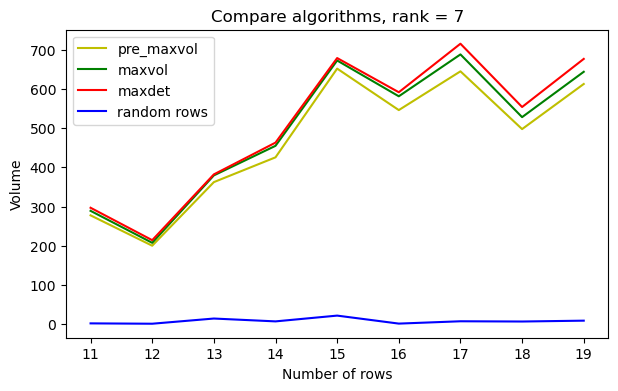

In [6]:
plotvolume(11, 20, 7)

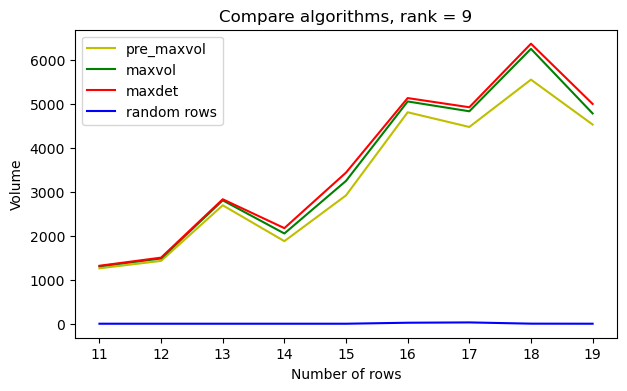

In [5]:
plotvolume(11, 20, 9)